In [ ]:
#引入函式庫
pip install jieba wordcloud matplotlib

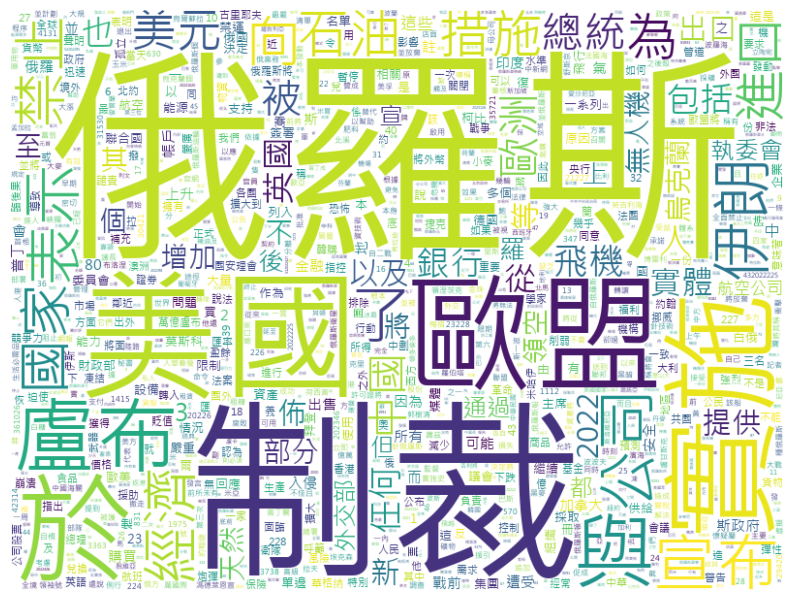

In [57]:
import requests
from bs4 import BeautifulSoup
import re
import jieba
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt

url = "https://zh.wikipedia.org/zh-tw/%E4%BF%84%E7%BD%97%E6%96%AF%E5%85%A5%E4%BE%B5%E4%B9%8C%E5%85%8B%E5%85%B0%E6%9C%9F%E9%97%B4%E7%9A%84%E5%9B%BD%E9%99%85%E5%88%B6%E8%A3%81"
headers = {
    "user-agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/118.0.0.0 Safari/537.36"
}

res = requests.get(url, headers=headers)
soup = BeautifulSoup(res.text, "html.parser")

# 抓取內容
contents = soup.find_all("p")

# 將 ResultSet 轉換為字符
text = "\n".join([content.get_text() for content in contents])

# 使用正則表達式去除不需要的内容
chars_to_replace = r"的|和|在|日|月|對|年"
cleaned_text = re.sub(r'[A-Za-z!@#$%^&*()_+{}[\]:;"\'<>,.?~\\/\-|=]', '', text)
cleaned_text = re.sub(chars_to_replace, '', cleaned_text)
cleaned_text = re.sub(r'\s+', '', cleaned_text)
seg_list = jieba.cut(cleaned_text, cut_all=False)
words = list(seg_list)
filtered_words = [word for word in words if re.match('[\u4e00-\u9fa50-9]+', word)]
# 統計詞頻
word_freq = Counter(filtered_words)
# 生成文字雲
font_path = "c:\Windows\Fonts\msjh.ttc"
wc = WordCloud(
    font_path=font_path,
    background_color="white",
    max_words=2000,
    width=800,
    height=600
)
wordcloud = wc.generate_from_frequencies(word_freq)

# 顯示文字雲
plt.figure(figsize=(10, 10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()
wordcloud.to_file("wordcloud.png")